# Customer Churn Prediction. 

## Introduction
Customer churn is the rate at which customers stop doing business with a company. It a critical metric across industries, especially in subscription-based models like telecom, SaaS, and media. Studies show that acquiring a new customer costs 5–7 times more than retaining an existing one, and a 5% increase in retention can boost profits by 25% to 95% (Harvard Business Review).

In this context, data analytics and predictive modeling are indispensable tools. They help identify patterns in customer behavior, detect early warning signs, and enable targeted interventions to reduce churn. By leveraging features like Tenure, Usage Frequency, Payment Delays, and Support Interactions, machine learning models can forecast churn with high accuracy empowering businesses to act before it's too late.

In [ ]:
# install the requirements file
! pip install -r requirements.txt

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)


## 1. Data Understanding & Cleaning

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# set the aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]
sns.set_palette(sns.color_palette(colors))

In [66]:
np.random.seed(42) # for reproducinbility

In [67]:
df = pd.read_csv('..\\datasets\\customer_churn_dataset-training-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [68]:
df.shape

(440833, 12)

The dataset has 400k+ records and 12 cols.


- **CustomerID**: Unique identifier for each customer (e.g., 2, 3, 4…).
- **Age**: Customer’s age in years (e.g., 30, 65).
- **Gender**: Customer’s gender (`Male`, `Female`).
- **Tenure**: Number of months the customer has stayed subscribed (e.g., 14, 39).
- **Usage Frequency**: Average number of service uses per month (e.g., 1 to 25).
- **Support Calls**: Number of support/helpdesk calls made (e.g., 0 to 10+).
- **Payment Delay**: Average days of delayed payments (e.g., 0 to 30+).
- **Subscription Type**: Type of plan (`Basic`, `Standard`, `Premium`).
- **Contract Length**: Billing cycle (`Monthly`, `Quarterly`, `Annual`).
- **Total Spend**: Total amount spent by the customer till date (e.g., ₹185 to ₹932).
- **Last Interaction**: Days since last customer engagement (e.g., 3 to 29).
- **Churn**: Target variable indicating if customer left (1 = Churned, 0 = Active).


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [70]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [71]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_percent

CustomerID           0.000227
Age                  0.000227
Gender               0.000227
Tenure               0.000227
Usage Frequency      0.000227
Support Calls        0.000227
Payment Delay        0.000227
Subscription Type    0.000227
Contract Length      0.000227
Total Spend          0.000227
Last Interaction     0.000227
Churn                0.000227
dtype: float64

Since missing values are significantly less in number (less than 0.5%), they can be dropped 

In [72]:
df= df.dropna()

In [73]:
df.shape

(440832, 12)

In [74]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## Checking for Outliers

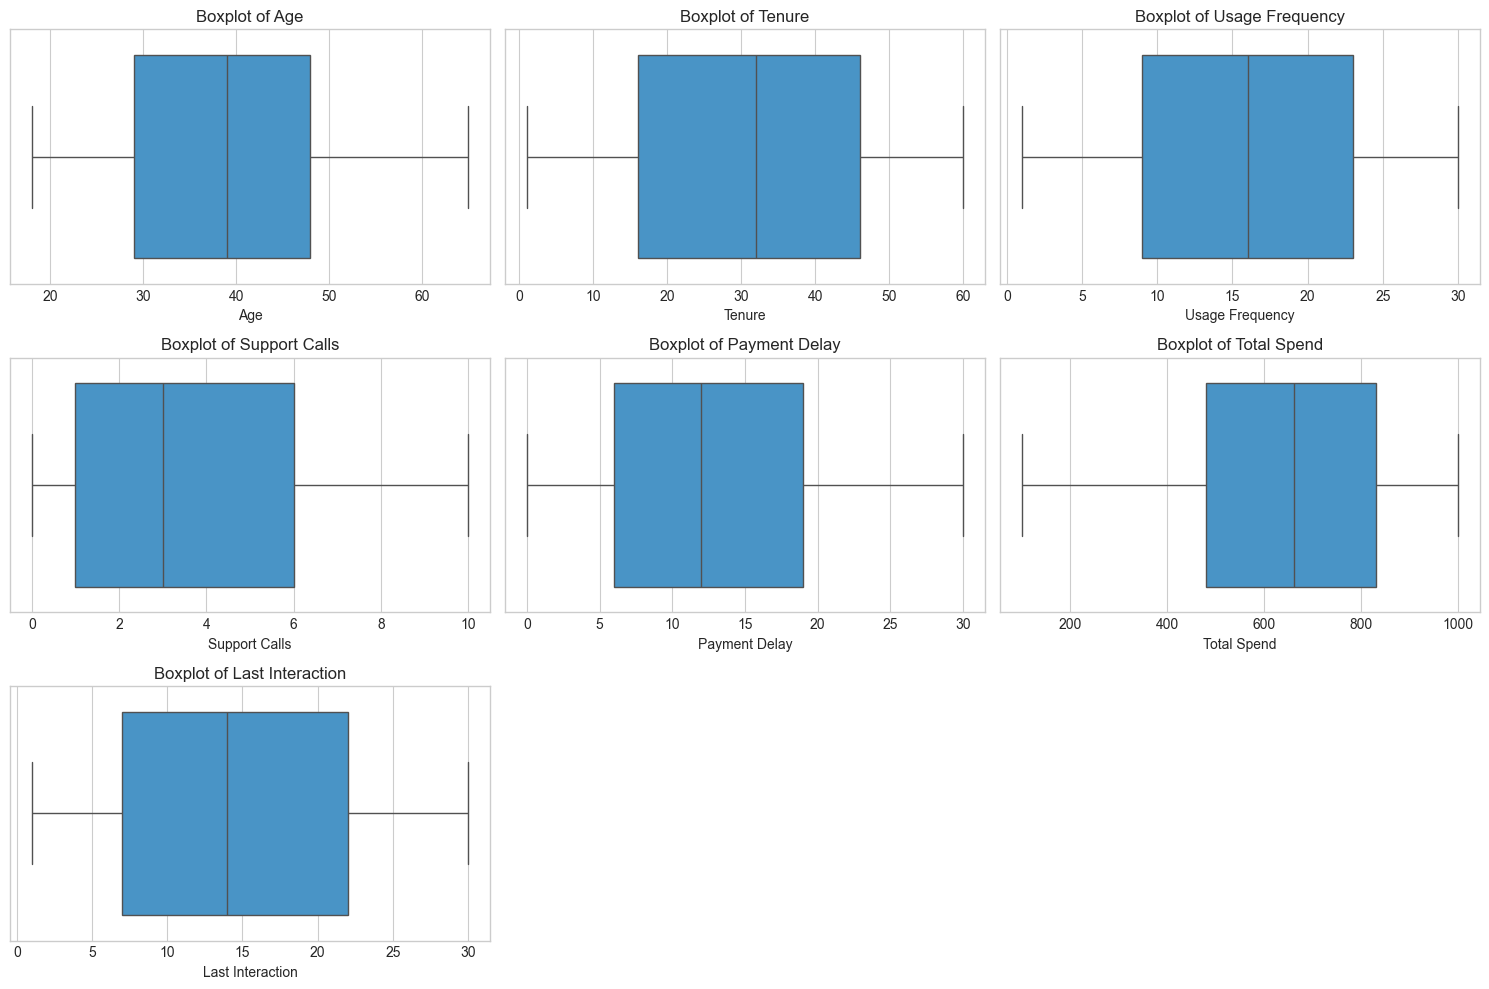

In [75]:
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('../outputs/outliers_boxplot.png')
plt.show()


No outliers detected. Data cleaning is done

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


## Correlation Analysis

Correlation analysis reveals linear relationships between variables helping us understand which features may influence churn and which ones move together.

In [77]:
correlation_matrix = df[numeric_cols + ['Churn']].corr()
print(correlation_matrix['Churn'].sort_values(ascending=False))


Churn               1.000000
Support Calls       0.574267
Payment Delay       0.312129
Age                 0.218394
Last Interaction    0.149616
Usage Frequency    -0.046101
Tenure             -0.051919
Total Spend        -0.429355
Name: Churn, dtype: float64


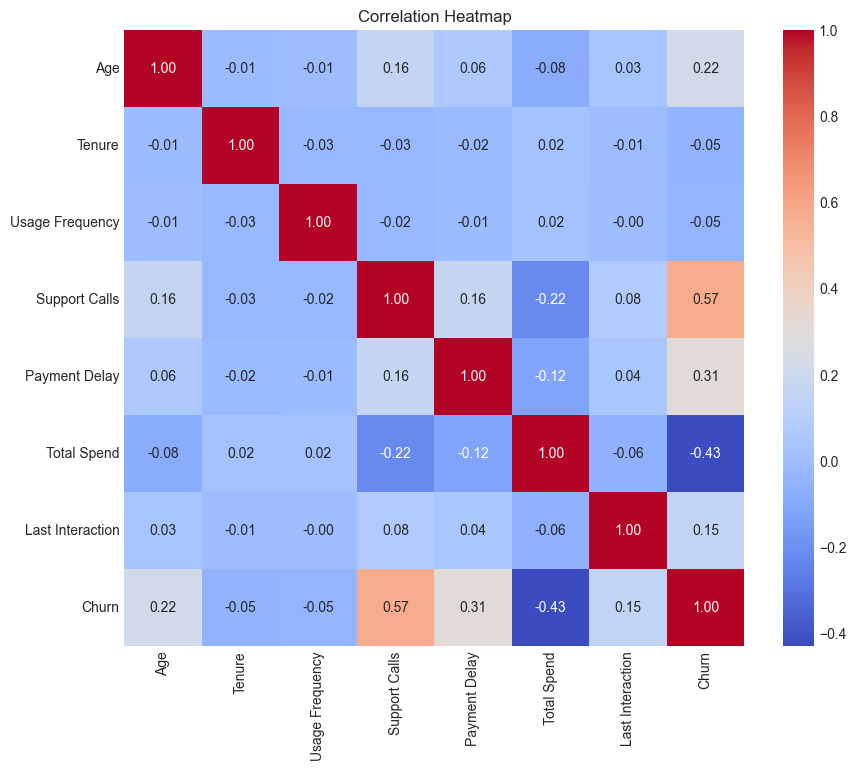

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('../outputs/correlation_heatmap.png')
plt.show()

**Observations and inisghts from the correlation analysis**

| Feature          | Correlation with churn | Observation                                                                 | Insight                                                                                                                                | Action                                                                                                                                                                                                                                                                                          |
|------------------|-------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Support Calls** | **0.57 (Positive)** | Higher number of support calls is associated with a higher likelihood of churn. | Customers requiring frequent support might be experiencing issues or dissatisfaction with the product/service. | Investigate call reasons why they're happening. Call first to check up on issues.                                                                                                                                                                                                                          |
| **Payment Delay** | **0.31 (Positive)** | Longer or more frequent payment delays are linked to a higher chance of churn. | Customers delaying payments might be financially strained or overthinking the quality/ ROI                                       | Communicate about payment offers/discounts options, our target is retention.                                                                                                                                                                                                                                  |
| **Age** | **0.22 (Positive)** | Older customers show a slightly higher tendency to churn.                   | Age might be a factor influencing churn, potentially due to changing needs, technology adoption, or retirement.                                                              | Analyze needs of older demographic, tailor communication/support.                                                                                                                                                                                                                         |
| **Last Interaction**| **0.15 (Positive)** | More recent last interaction is weakly associated with a slightly higher churn. | might suggest that recent interactions were negative or didn't resolve underlying issues leading to churn shortly after.                       | Analyze recent calls, dont leave issues unresolved                                                                                                                                                                                                                                |
| **Tenure** | **-0.05 (Negative)** | Longer tenure has a very weak negative association with churn.              | While weak, it suggests that customers who have been with the company longer are slightly less likely to churn. Building long-term relationships is generally beneficial.          | Focus on long-term loyalty programs                                                                                                                                                                                                                                           |
| **Usage Frequency**| **-0.05 (Negative)** | Higher usage frequency has a very weak negative association with churn.     | Simply using the service more often doesn't strongly guarantee retention.                                         | Investigate quality/purpose of usage,focus on value delivery.                                                                                                                                                                                                                                      |
| **Total Spend** | **-0.43 (Negative)** | Higher total spending is moderately associated with a lower likelihood of churn. | Customers who have invested more financially are less likely to leave, possibly due to initial high investment. This is a valuable segment to retain.         | Prioritize high-spending customers, offer premium support/rewards.                                                                                                                                                                                                                                  |

For further analysis of relationships between the variables, we shall perform statistical tests like `Chi-square` test and `ANOVA` test. Correlation analysis only captures linear relationships between numerical variables. It does not handle categorical variables well or detect non-linear dependencies.

## Chi-square tests for categorical variables

In [79]:
from scipy.stats import chi2_contingency, f_oneway

In [80]:
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: Chi2 = {chi2:.2f}, p-value = {p:.10f}")
    if p < 0.05:
        print(f"  - Significant association detected with churn")


Gender: Chi2 = 13560.73, p-value = 0.0000000000
  - Significant association detected with churn
Subscription Type: Chi2 = 186.23, p-value = 0.0000000000
  - Significant association detected with churn
Contract Length: Chi2 = 82862.39, p-value = 0.0000000000
  - Significant association detected with churn


When analyzing relationships between categorical variables using tests like the Chi-Squared test for independence, a reported p-value of 0 still means extremely strong evidence against the null hypothesis.

## ANOVA Tests for numerical variables

In [81]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [82]:

for col in numeric_cols:
    churned = df[df['Churn'] == 1][col]
    not_churned = df[df['Churn'] == 0][col]
    f_stat, p_value = f_oneway(churned, not_churned)
    print(f"{col}: F = {f_stat:.2f}, p-value = {p_value:.10f}")
    if p_value < 0.05:
        print(f"  - Significant difference between churned and non-churned customers")

Age: F = 22078.86, p-value = 0.0000000000
  - Significant difference between churned and non-churned customers
Tenure: F = 1191.50, p-value = 0.0000000000
  - Significant difference between churned and non-churned customers
Usage Frequency: F = 938.89, p-value = 0.0000000000
  - Significant difference between churned and non-churned customers
Support Calls: F = 216911.94, p-value = 0.0000000000
  - Significant difference between churned and non-churned customers
Payment Delay: F = 47583.53, p-value = 0.0000000000
  - Significant difference between churned and non-churned customers
Total Spend: F = 99631.72, p-value = 0.0000000000
  - Significant difference between churned and non-churned customers
Last Interaction: F = 10093.91, p-value = 0.0000000000
  - Significant difference between churned and non-churned customers


A reported p-value of 0 in ANOVA means we have very strong evidence to reject the null hypothesis that all group means are equal.Since it is theoretically impossible for p-value to be exact 0, reported p-value of 0 could mean that it is smaller than the level of precision the software can display so report the p-value as being less than a very small threshold (e.g., p < 0.001).

What these two test results mean is such low p-values mean the patterns you're seeing are real, not random noise ideal targets for retention strategy or model features.

## EDA

### What is the overall churn rate in the dataset?

In [83]:
churn_rate = df['Churn'].mean() * 100
print(f"Overall churn rate: {churn_rate:.2f}%")

Overall churn rate: 56.71%


C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\1598891535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=['#3498db', '#e74c3c'])


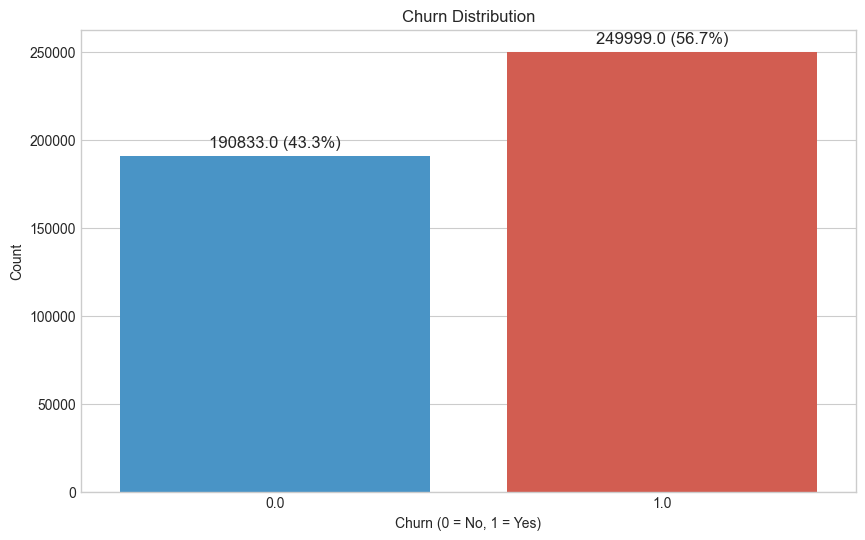

In [84]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5000,
            f'{height} ({height/total*100:.1f}%)',
            ha="center", fontsize=12)

plt.savefig('../outputs/churn_distribution.png')
plt.show()

### Numerical variable distribtuions by churn

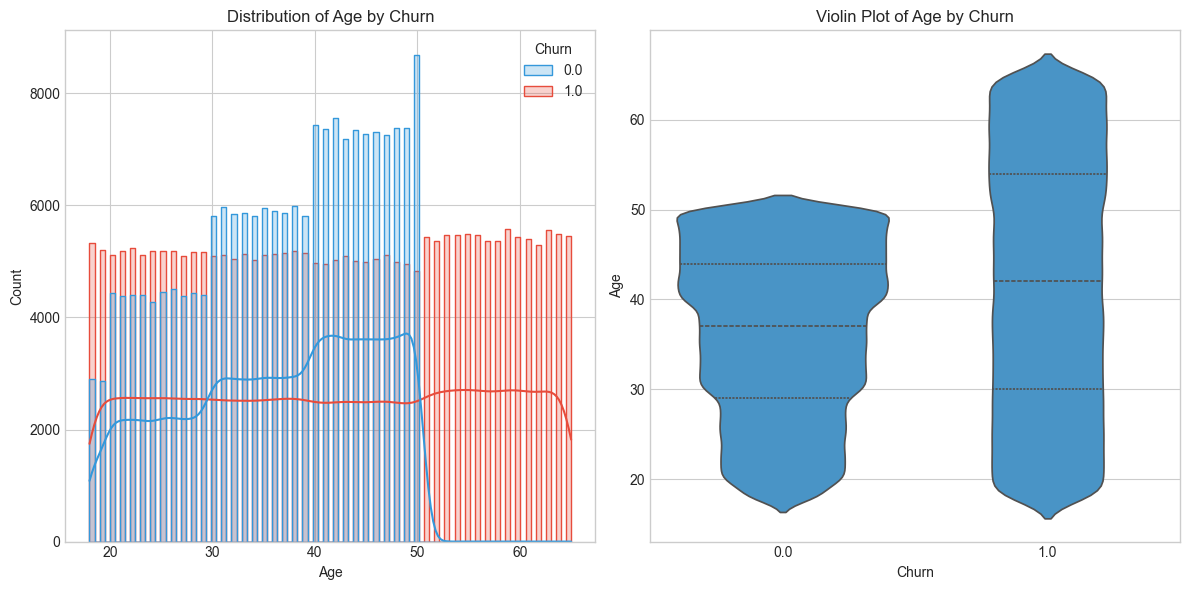

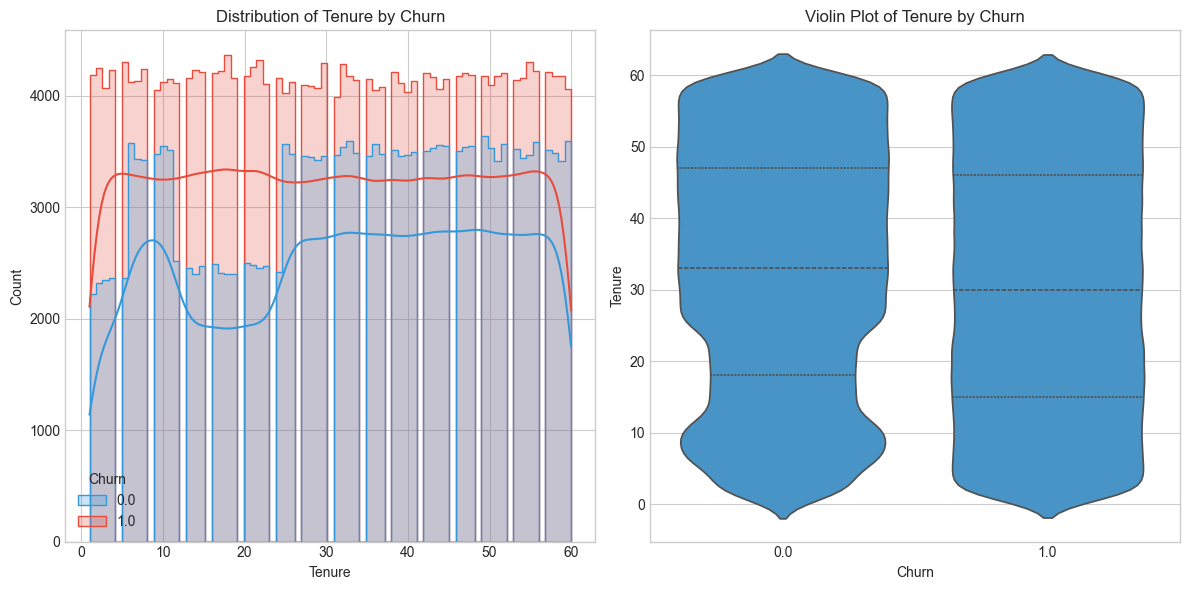

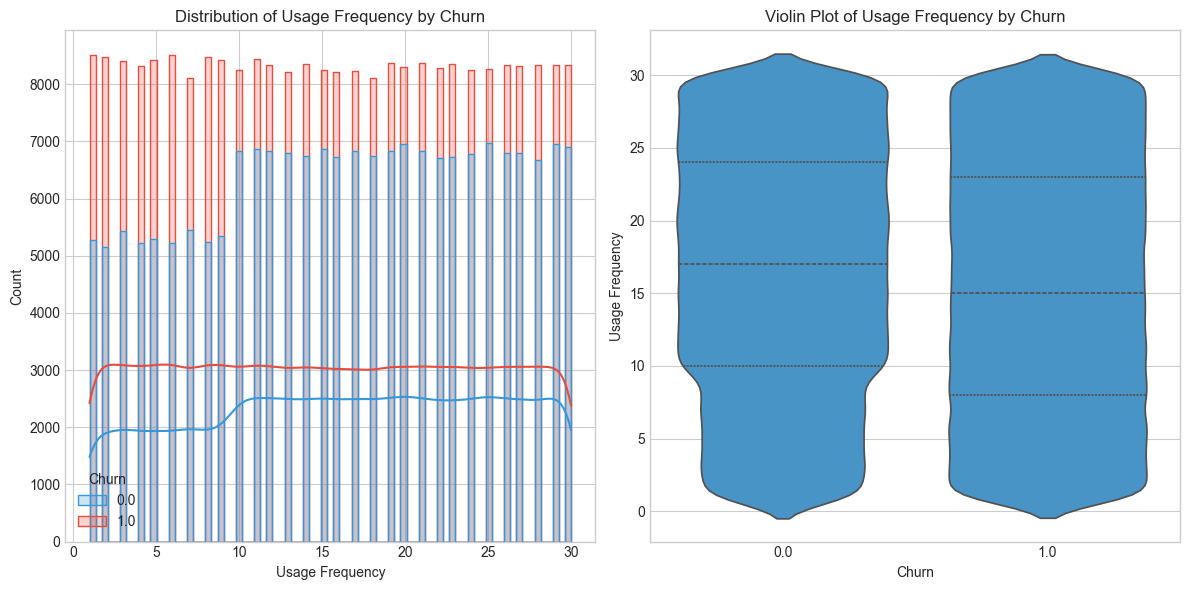

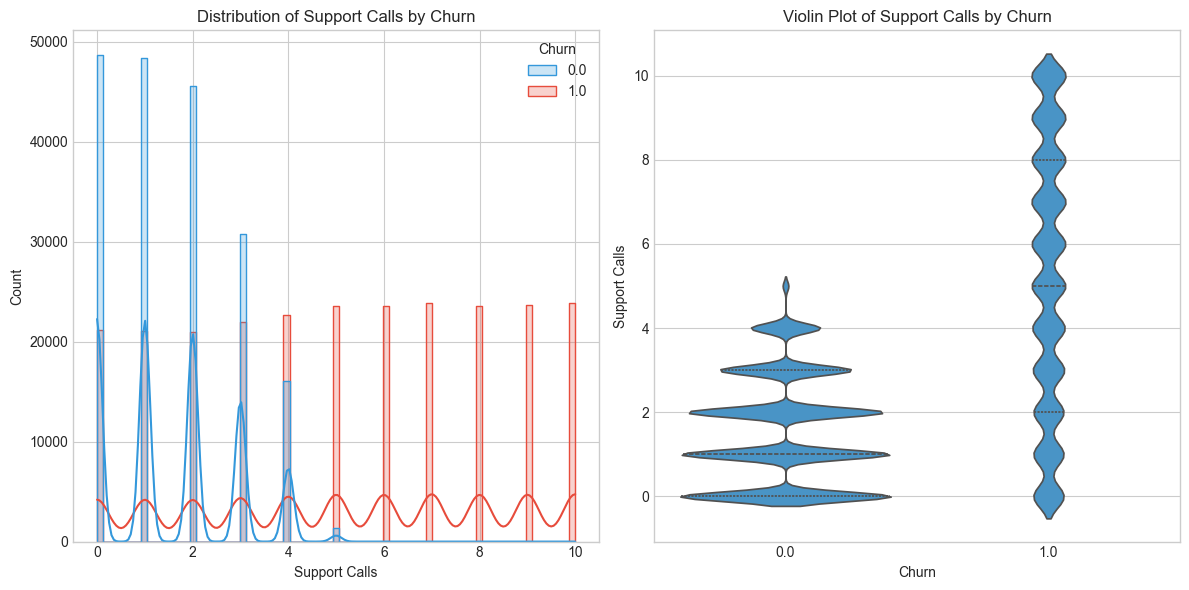

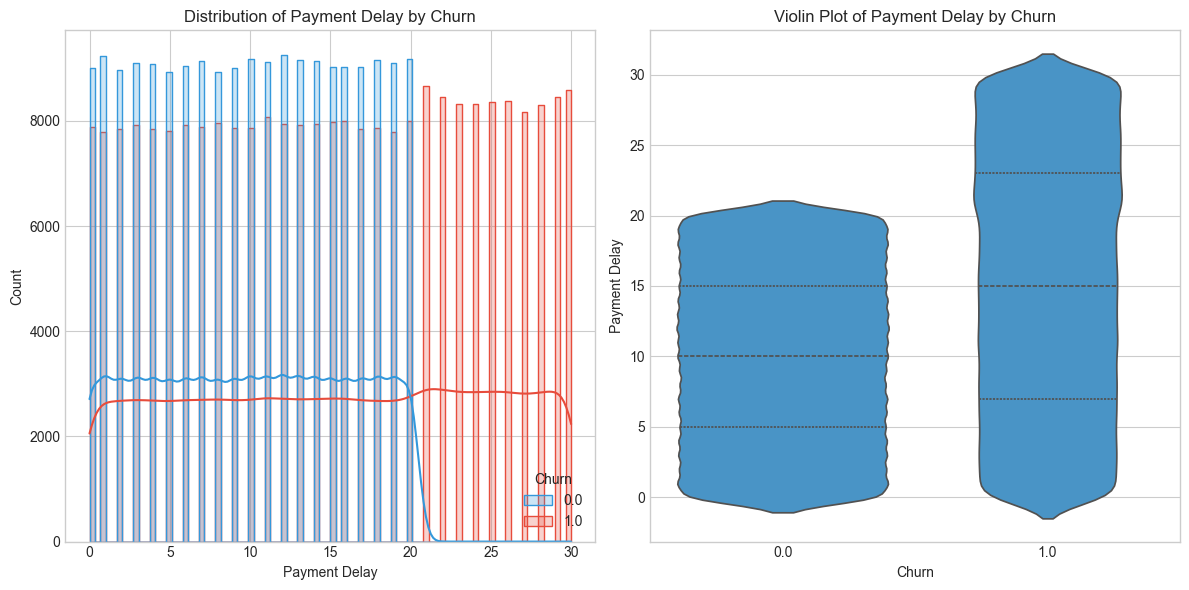

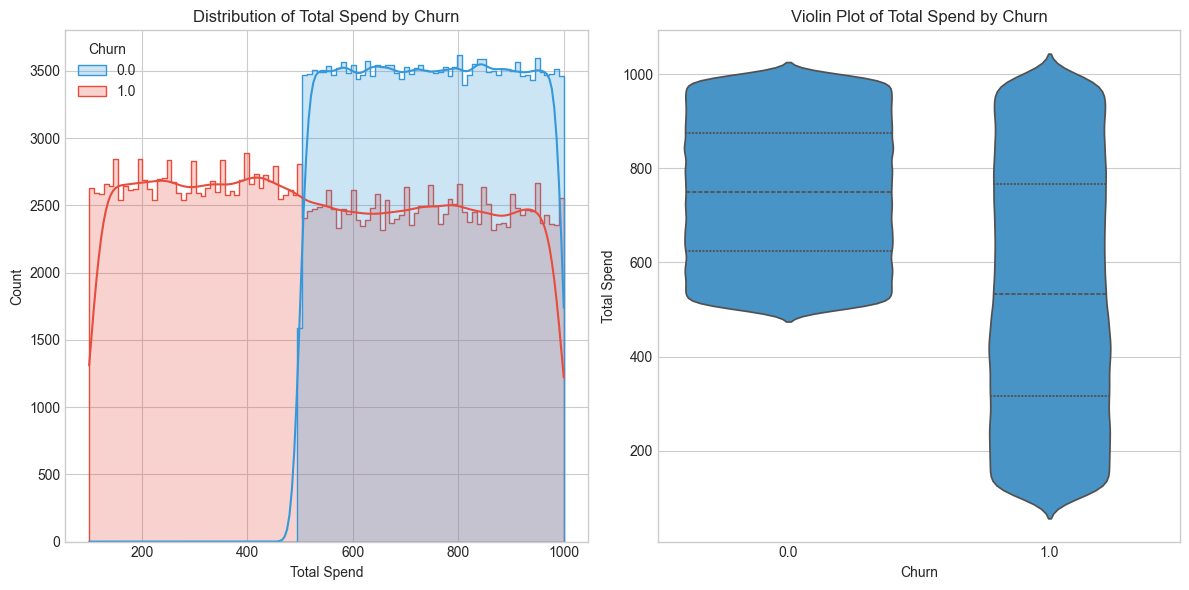

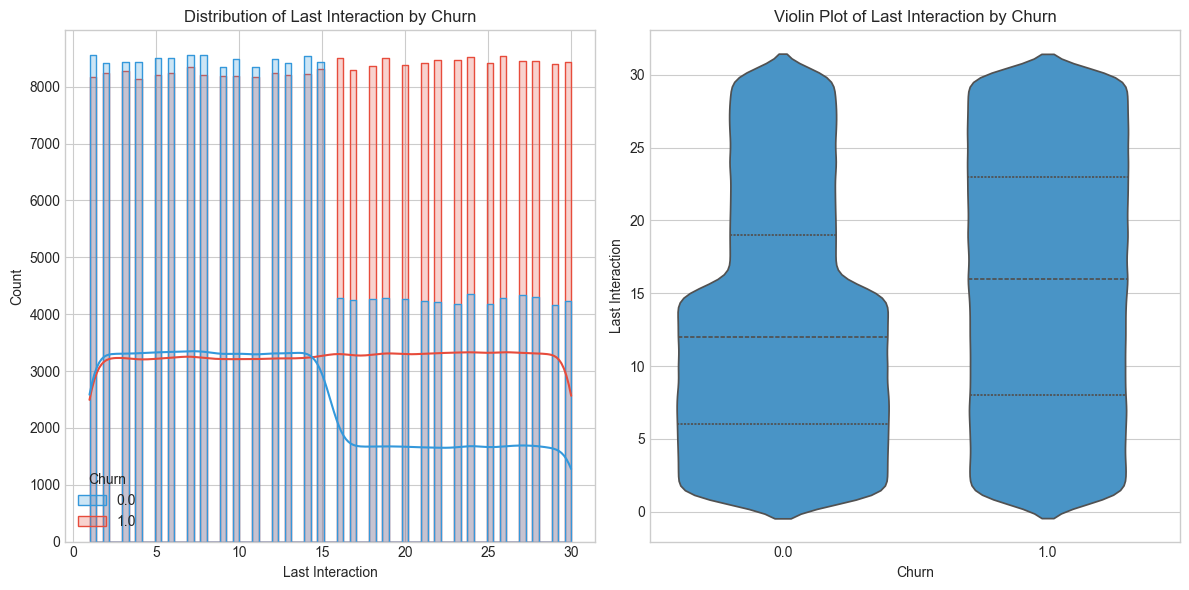

In [85]:
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # hist with density plot
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, element='step')
    plt.title(f'Distribution of {col} by Churn')
    
    # violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x='Churn', y=col, data=df, inner='quartile')
    plt.title(f'Violin Plot of {col} by Churn')
    
    plt.tight_layout()
    plt.savefig(f'../outputs/distribution_{col}.png')
    plt.show()

### Categorical variable analysis

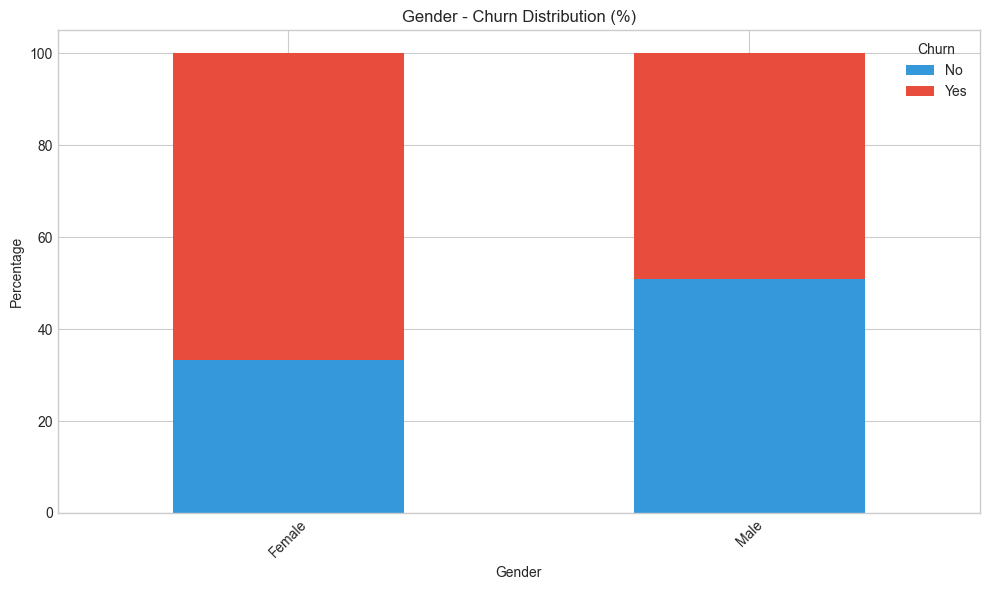

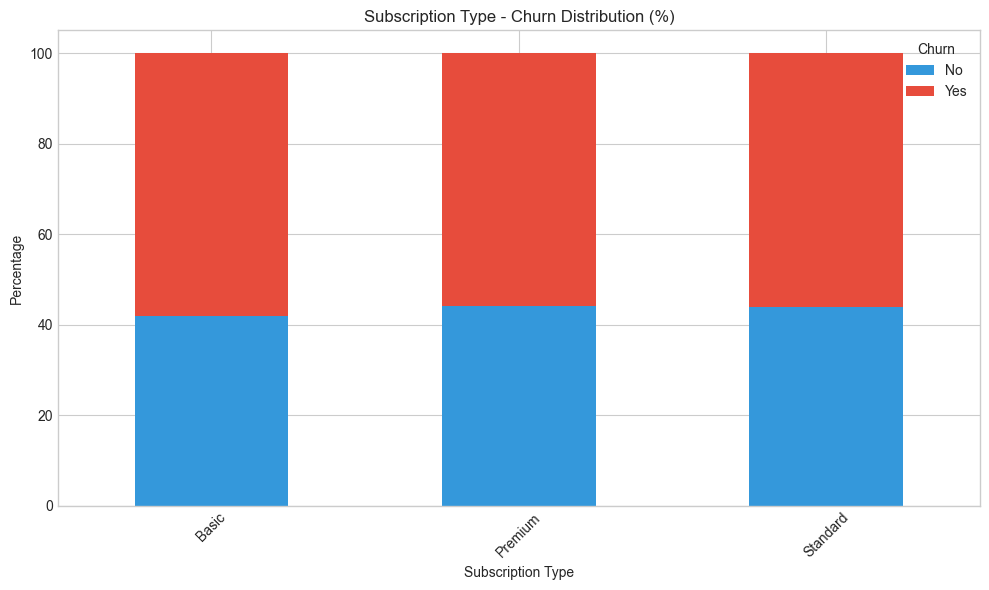

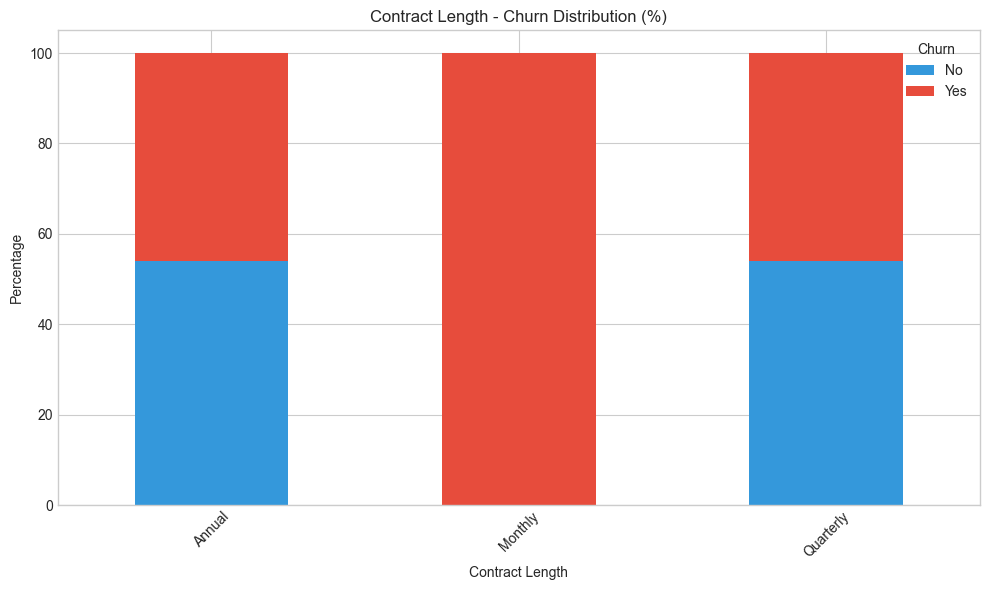

In [86]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    churn_pct = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    churn_pct = churn_pct[[0, 1]] 

    churn_pct.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())

    plt.title(f'{col} - Churn Distribution (%)')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.savefig(f'../outputs/stackedbar_{col}.png')
    plt.show()

### Cross-tabulation analysis: Contract Length vs Subscription Type

In [87]:

cross_tab = pd.crosstab(df['Contract Length'], df['Subscription Type'], 
                         values=df['Churn'], aggfunc='mean') * 100
print(cross_tab)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Churn Rate (%) by Contract Length and Subscription Type')
plt.savefig('../outputs/churn_heatmap_contract_subscription.png')
plt.close()

Subscription Type       Basic     Premium    Standard
Contract Length                                      
Annual              47.450092   45.391790   45.445305
Monthly            100.000000  100.000000  100.000000
Quarterly           47.588351   45.076195   45.497938


Customers on Monthly contracts have a 100% churn rate across all subscription types!! making them the most unstable segment.

## Feature engineering

Let us introduce some new features to turn raw data into behavioral signals making the model smarter at detecting early signs of churn.


1. `CLV` (customer lifetime value)  
   tells you how much money a customer might bring in over time. low clv = kinda low value, probably gonna churn soon.

2. `monthly_spend = total spend / tenure`  
   shows how regularly they spend. if it’s low or suddenly drops, they might be losing interest or too price-sensitive.

3. `usage_intensity = usage freq / tenure`  
   gives an idea of how *into* the product they are. low usage even after staying long = maybe bored or not finding value.

4. `support_call_rate = support calls / tenure`  
   too many calls? probably had issues. if issues doesn’t get fixed, they quit.

5. `last_interaction_ratio = last interaction / tenure`  
   basically checks if they stopped interaction recently. high ratio = they used to be active. pre-churn alert.

6. `payment_delay_tenure_ratio = payment delay / tenure`  
   if they keep delaying payments often, it’s a sign they'll churn. either money issues or just not invested anymore.



In [88]:
new_features = ['CLV', 'Monthly_Spend', 'Usage_Intensity', 'Support_Call_Rate', 
                'Last_Interaction_Ratio', 'Payment_Delay_Tenure_Ratio']

In [89]:
df['CLV'] = df['Total Spend'] / (df['Tenure'] + 1)  # add 1 to avoid division by zero
df['Monthly_Spend'] = df['Total Spend'] / (df['Tenure'] + 1)
df['Usage_Intensity'] = df['Usage Frequency'] / (df['Tenure'] + 1)
df['Support_Call_Rate'] = df['Support Calls'] / (df['Tenure'] + 1)
df['Last_Interaction_Ratio'] = df['Last Interaction'] / (df['Tenure'] + 1)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 65, 100], 
                         labels=['Under 25', '25-35', '36-50', '51-65', 'Over 65'])
df['Tenure_Group'] = pd.cut(df['Tenure'], bins=[0, 6, 12, 24, 36, float('inf')], 
                           labels=['0-6 Months', '7-12 Months', '1-2 Years', '2-3 Years', '3+ Years'])
df['Payment_Delay_Tenure_Ratio'] = df['Payment Delay'] / (df['Tenure'] + 1)


In [90]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,CLV,Monthly_Spend,Usage_Intensity,Support_Call_Rate,Last_Interaction_Ratio,Age_Group,Tenure_Group,Payment_Delay_Tenure_Ratio
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,23.300000,23.300000,0.350000,0.125000,0.425000,25-35,3+ Years,0.450000
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,11.140000,11.140000,0.020000,0.200000,0.120000,51-65,3+ Years,0.160000
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,12.333333,12.333333,0.266667,0.400000,0.200000,51-65,1-2 Years,1.200000
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,10.153846,10.153846,0.538462,0.179487,0.743590,51-65,3+ Years,0.179487
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18.696970,18.696970,0.606061,0.151515,0.606061,Under 25,2-3 Years,0.242424


### Correlation of new features with churn

In [91]:
for feature in new_features:
    correlation = df[feature].corr(df['Churn'])
    print(f"{feature}: {correlation:.4f}")

CLV: -0.0698
Monthly_Spend: -0.0698
Usage_Intensity: 0.0211
Support_Call_Rate: 0.2656
Last_Interaction_Ratio: 0.0869
Payment_Delay_Tenure_Ratio: 0.1459


Lets store these as our final features for modeling

In [92]:
numerical_cols = [
    'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
    'Total Spend', 'Last Interaction', 'CLV', 'Monthly_Spend',
    'Usage_Intensity', 'Support_Call_Rate', 'Last_Interaction_Ratio',
    'Payment_Delay_Tenure_Ratio'
]

categorical_cols = [
    'Gender', 'Subscription Type', 'Contract Length',
    'Age_Group', 'Tenure_Group'
]


## Modeling

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

import joblib

In [94]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [95]:
print(f"Numerical features: {numerical_cols}")
print(f"Categorical features: {categorical_cols}")

Numerical features: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'CLV', 'Monthly_Spend', 'Usage_Intensity', 'Support_Call_Rate', 'Last_Interaction_Ratio', 'Payment_Delay_Tenure_Ratio']
Categorical features: ['Gender', 'Subscription Type', 'Contract Length', 'Age_Group', 'Tenure_Group']


### Splitting the dataset

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 352665 samples
Test set size: 88167 samples


In [97]:
# we define a custom label encoder transformer
def label_encode_columns(X):
    from sklearn.preprocessing import LabelEncoder
    import pandas as pd
    X = X.copy()
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X.iloc[:, i] = le.fit_transform(X.iloc[:, i])
    return X

label_encoder = FunctionTransformer(label_encode_columns, validate=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', label_encoder, categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)

C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\430856070.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 1 0 2]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = le.fit_transform(X.iloc[:, i])
C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\430856070.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 3 1 ... 3 0 4]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = le.fit_transform(X.iloc[:, i])


In [98]:
X_train_processed

array([[0.21037671329865135, 0.8552712137949764, 1.6512380480663476, ...,
        0, 1, 3],
       [-0.5127839114669795, 0.6814545879334514, 0.13705612941063675,
        ..., 0, 0, 3],
       [-1.0752421751735814, -1.0567116706817978, 1.6512380480663476,
        ..., 2, 0, 1],
       ...,
       [0.612132615946224, 0.6814545879334514, -0.2123704672022196, ...,
        0, 1, 3],
       [-0.43243273093746504, -1.6940392988407227, -0.7947481282236468,
        ..., 2, 0, 0],
       [1.0138885185937967, -1.1725894212561478, 1.3018114514534913, ...,
        1, 2, 4]], dtype=object)

In [99]:
joblib.dump(preprocessor, "../vault/churn_preprocessor.pkl")
print("Saved: churn_preprocessor.pkl")


Saved: churn_preprocessor.pkl


In [100]:
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)


Class distribution in training set:
Churn
1.0    56.71076
0.0    43.28924
Name: proportion, dtype: float64


The class distribution is fairly balanced.

### Train and evaluate models


###  why **Logistic Regression**, **Random Forest**, & **XGBoost**?


#### 1. logistic regression(interpretable baseline)  
- a linear classifier that estimates log-odds of churn, outputting calibrated probabilities.  
- great for feature coefficient analysis making it valuable for insights on individual predictor impact.  
- highly interpretable, minimal preprocessing, and computationally efficient perfect for early-stage exploration or explainability-heavy contexts.

#### 2. random forest (ensemble generalist)  
- non-parametric model that builds multiple decision trees and aggregates outputs (bagging).  
- captures nonlinear relationship and complex feature interactions without overfitting (thanks to randomness).  
- robust to outliers, handles both numerical and categorical features well.  
- provides feature importance scores, enabling model explainability while still achieving strong performance.


#### 3. xgboost (gradient boosting powerhouse)  
- optimized implementation of gradient boosted trees, known for regularized learning and sparse-aware algorithms.  
- strong generalization via shrinkage, column subsampling and tree pruning.  .  




In [101]:
import joblib

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report, 
    roc_curve, precision_recall_curve, ConfusionMatrixDisplay
)

In [102]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}


results = {}

In [103]:
top_models = []
best_auc = 0

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_processed, y_train)
    
    X_test_transformed = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_transformed)
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'model': model
    }

for name, model in models.items():
    
    if auc > best_auc:
        best_auc = auc
        top_models = [(name, model)]
    elif auc == best_auc:
        top_models.append((name, model))

# Save all models with best AUC
for name, model in top_models:
    model_path = f"../vault/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_path)
    print(f"Saved: {model_path}")



Training Logistic Regression...


C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\430856070.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 0 1 ... 0 1 0]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = le.fit_transform(X.iloc[:, i])
C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\430856070.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 2 3 ... 1 0 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = le.fit_transform(X.iloc[:, i])



Training Random Forest...


C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\430856070.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 0 1 ... 0 1 0]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = le.fit_transform(X.iloc[:, i])
C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\430856070.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 2 3 ... 1 0 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = le.fit_transform(X.iloc[:, i])



Training XGBoost...


C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\430856070.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 0 1 ... 0 1 0]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = le.fit_transform(X.iloc[:, i])
C:\Users\nirul\AppData\Local\Temp\ipykernel_1120\430856070.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 2 3 ... 1 0 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = le.fit_transform(X.iloc[:, i])


Saved: ../vault/logistic_regression_model.pkl
Saved: ../vault/random_forest_model.pkl
Saved: ../vault/xgboost_model.pkl


In [104]:
results['Logistic Regression']

{'accuracy': 0.8607642315151928,
 'precision': 0.8877718843797541,
 'recall': 0.86366,
 'f1': 0.8755499685732244,
 'auc': np.float64(0.9353667980192313),
 'model': LogisticRegression(max_iter=1000, random_state=42)}

In [105]:
results['Random Forest']

{'accuracy': 0.9994669207299783,
 'precision': 0.9999399507596229,
 'recall': 0.99912,
 'f1': 0.9995298072209606,
 'auc': np.float64(0.9999990593968612),
 'model': RandomForestClassifier(random_state=42)}

In [106]:
results['XGBoost']

{'accuracy': 0.9999206052151032,
 'precision': 1.0,
 'recall': 0.99986,
 'f1': 0.999929995099657,
 'auc': np.float64(0.999999031624178),
 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...)}

In [107]:

metrics_df = pd.DataFrame({
    name: {
        'Accuracy': vals['accuracy'],
        'Precision': vals['precision'],
        'Recall': vals['recall'],
        'F1-Score': vals['f1'],
        'ROC AUC': vals['auc']
    }
    for name, vals in results.items()
}).T

metrics_df = metrics_df.sort_values(by=['F1-Score'], ascending=False)


print("\n Model Comparison Metrics:")
print(metrics_df.round(4))



 Model Comparison Metrics:
                     Accuracy  Precision  Recall  F1-Score  ROC AUC
XGBoost                0.9999     1.0000  0.9999    0.9999   1.0000
Random Forest          0.9995     0.9999  0.9991    0.9995   1.0000
Logistic Regression    0.8608     0.8878  0.8637    0.8755   0.9354


C:\Users\nirul\AppData\Local\Temp\ipykernel_18212\3778964035.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='mako')


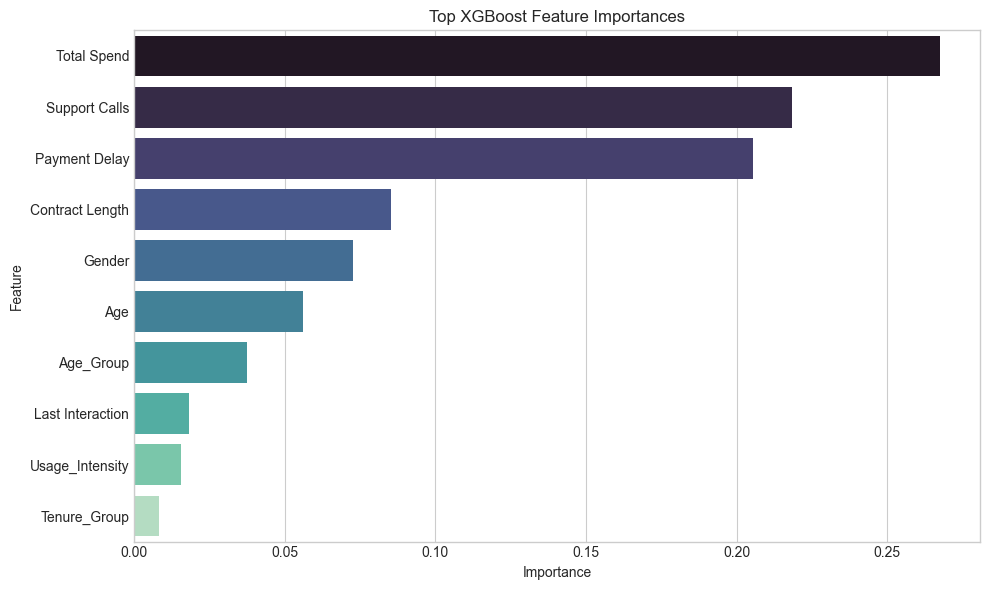

In [ ]:
final_feature_names = numerical_cols + categorical_cols

xgb_model = results['XGBoost']['model']
importances = xgb_model.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='mako')
plt.title('Top XGBoost Feature Importances')
plt.tight_layout()
plt.show()


### SHAP VALUES for Model Explainability

SHAP values (SHapley Additive exPlanations) quantify how much each feature contributes to a specific prediction, based on game theory.

A SHAP summary plot shows overall feature importance and how each feature’s value (high/low) impacts model output across all samples.

In [ ]:
import shap

explainer = shap.TreeExplainer(results['XGBoost']['model'])

shap_values = explainer.shap_values(X_train_processed)


c:\Users\nirul\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\nirul\AppData\Local\Temp\ipykernel_18212\798310387.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train_processed, feature_names=final_feature_names, show=False)


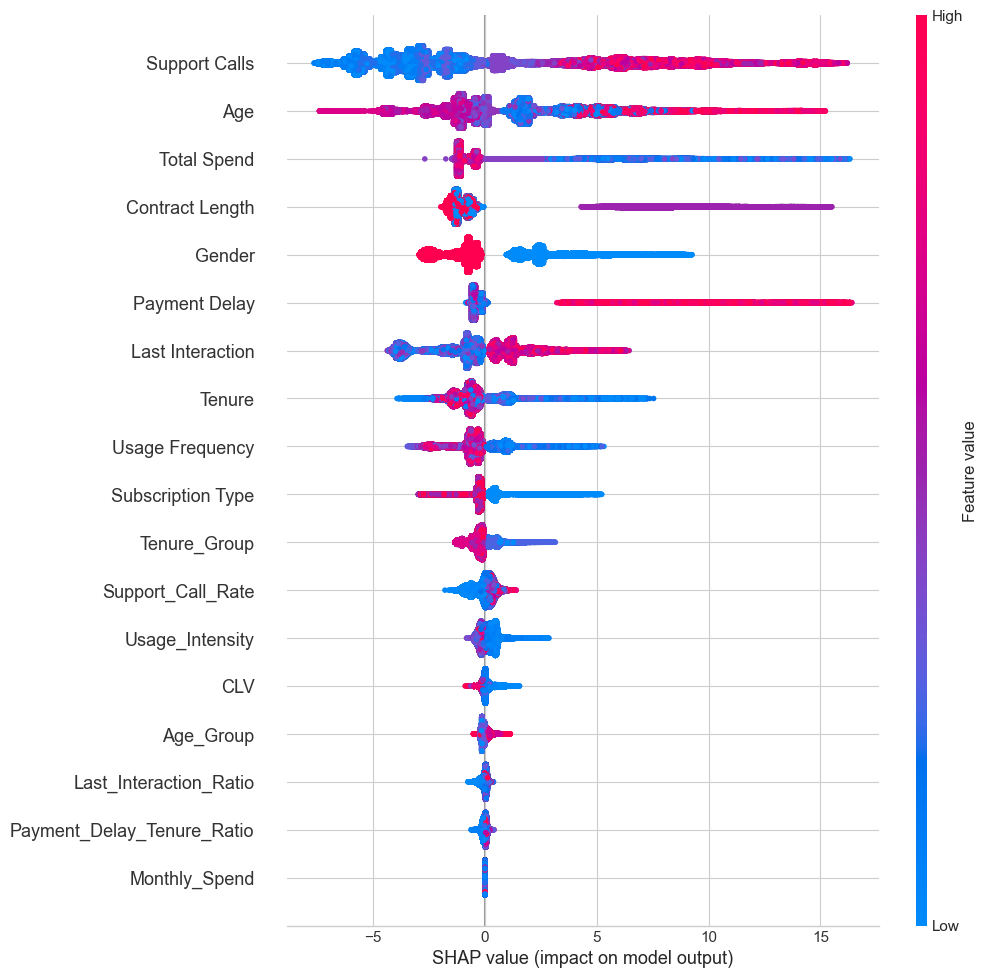

In [ ]:
shap.summary_plot(shap_values, X_train_processed, feature_names=final_feature_names, show=False)

fig = plt.gcf() 
fig.set_size_inches(12, 10)
fig.savefig('../outputs/shap_summary.png', bbox_inches='tight')
plt.show(fig)




## SHAP summary - Conclusion 

- Each dot represents a single customer. Where the dot sits on the horizontal axis tells us how much that specific feature pushed the model's prediction for that customer towards either "more likely to churn" (positive SHAP value, leaning towards the right) or "less likely to churn" (negative SHAP value, leaning left).

- The color of the dot is also important. It tells us the original value of that feature for that customer. Reddish colors usually mean a higher value for that feature, while bluish colors mean a lower value.

For example, peep at "Support Calls." You can see a bunch of reddish dots way over on the right side. This strongly suggests that customers who make a lot of support calls are much more likely to churn, according to our model. On the flip side, blue dots for "Support Calls" are mostly on the left, meaning fewer support calls make someone less likely to leave.

- Take a look at "Tenure" down there. You'll notice a lot of red dots hanging out on the left side. This implies that customers with a longer tenure (been with us for a while) are generally less likely to churn. The blue dots (shorter tenure) are more spread out, some even venturing towards the right, indicating that newer customers have a more varied impact on churn prediction.

By looking at the distribution and color of these dots, we can get a pretty good idea of how different customer characteristics influence their likelihood of churning. It's super useful for figuring out where to focus our efforts to keep customers happy!